In [1]:
import torch
import torchvision
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
from torch.utils.data import Dataset, DataLoader
import os 
from warnings import simplefilter

In [2]:
import models
import class_sampling
import train
import metric_utils
import inference

In [3]:
NUM_CLASSES = 10
NUM_CLASSES_REDUCED = 3
n_epochs = 20
batch_size_train = 64
batch_size_test = 1000
momentum = 0

ratio = (100, 1)

random_seed = 1
torch.backends.cudnn.enabled = False
torch.manual_seed(random_seed)

nums = (0, 1)

CLASS_LABELS = {'airplane': 0,
                 'automobile': 1,
                 'bird': 2,
                 'cat': 3,
                 'deer': 4,
                 'dog': 5,
                 'frog': 6,
                 'horse': 7,
                 'ship': 8,
                 'truck': 9}

DIRECTORY = f"results/CIFAR10_logistic_regression"
RATIO_STR = str(ratio[0])


simplefilter(action='ignore', category=FutureWarning)
simplefilter(action='ignore', category=UserWarning)
simplefilter(action='ignore', category=DeprecationWarning)

In [4]:
train_CIFAR10 = torchvision.datasets.CIFAR10('cifar10', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor() ]))  


test_CIFAR10 = torchvision.datasets.CIFAR10('cifar10', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor()]))

train_CIFAR10.data = train_CIFAR10.data.reshape(50000, 3, 32, 32)
test_CIFAR10.data = test_CIFAR10.data.reshape(10000, 3, 32, 32)

    
reduced_train_CIFAR10 = class_sampling.Reduce(train_CIFAR10, NUM_CLASSES_REDUCED, nums=nums, CIFAR=True)
reduced_test_CIFAR10 = class_sampling.Reduce(test_CIFAR10, NUM_CLASSES_REDUCED, nums=nums, CIFAR=True)

# ratio_train_CIFAR10 = class_sampling.BinaryRatio(train_CIFAR10, NUM_CLASSES_REDUCED, ratio, nums=nums,CIFAR=True)

ratio_train_CIFAR10 = class_sampling.Ratio(train_CIFAR10, 3, (10, 5, 5))

Files already downloaded and verified
Files already downloaded and verified


In [5]:
targets = ratio_train_CIFAR10.labels

class_count = np.unique(targets, return_counts=True)[1]

weight = 1. / class_count
samples_weight = weight[targets]
samples_weight = torch.from_numpy(samples_weight)
sampler = torch.utils.data.WeightedRandomSampler(samples_weight, len(samples_weight))

In [6]:
train_loader_reduced = DataLoader(reduced_train_CIFAR10, batch_size=batch_size_train, shuffle=True) 

test_loader_reduced = DataLoader(reduced_test_CIFAR10, batch_size=batch_size_test, shuffle=True) 

train_loader_ratio = DataLoader(ratio_train_CIFAR10, batch_size=batch_size_train, shuffle=True)

train_loader_oversampled = DataLoader(ratio_train_CIFAR10, batch_size=batch_size_train, sampler=sampler)


In [23]:
dir(train_loader_ratio.dataset.images)

['H',
 'T',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_priority__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__complex__',
 '__contains__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__div__',
 '__dlpack__',
 '__dlpack_device__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__idiv__',
 '__ifloordiv__',
 '__ilshift__',
 '__imod__',
 '__imul__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__irshift__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__long__',
 '__lshift__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdiv__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed_


Test set: Avg. loss: 0.06666752624511718, AUC: 0.5195465


Test set: Avg. loss: 718.444625, AUC: 0.5805


Test set: Avg. loss: 291.67678125, AUC: 0.7215


Test set: Avg. loss: 172.083046875, AUC: 0.7945


Test set: Avg. loss: 768.6840625, AUC: 0.5425


Test set: Avg. loss: 730.1569375, AUC: 0.5509999999999999


Test set: Avg. loss: 139.1209765625, AUC: 0.8085


Test set: Avg. loss: 559.16290625, AUC: 0.568


Test set: Avg. loss: 140.6664765625, AUC: 0.8105


Test set: Avg. loss: 147.2619296875, AUC: 0.8095


Test set: Avg. loss: 130.575796875, AUC: 0.8165000000000001


Test set: Avg. loss: 747.3089375, AUC: 0.5455


Test set: Avg. loss: 159.124078125, AUC: 0.7909999999999999


Test set: Avg. loss: 245.4269765625, AUC: 0.7184999999999999


Test set: Avg. loss: 709.67903125, AUC: 0.5965


Test set: Avg. loss: 134.7573515625, AUC: 0.8135000000000001


Test set: Avg. loss: 452.7011875, AUC: 0.5925


Test set: Avg. loss: 722.19009375, AUC: 0.542


Test set: Avg. loss: 636.21075, AUC: 0.616


Test set: Avg. loss: 439.172015625, AUC: 0.6724999999999999


Test set: Avg. loss: 188.4962265625, AUC: 0.78


Test set: Avg. loss: 1233.7974375, AUC: 0.5415


Test set: Avg. loss: 816.65640625, AUC: 0.5765


Test set: Avg. loss: 386.34215625, AUC: 0.619


Test set: Avg. loss: 1041.79665625, AUC: 0.51


Test set: Avg. loss: 144.8603046875, AUC: 0.8079999999999999


Test set: Avg. loss: 132.35066796875, AUC: 0.818


Test set: Avg. loss: 521.156984375, AUC: 0.649


Test set: Avg. loss: 742.0541875, AUC: 0.5365


Test set: Avg. loss: 180.66509375, AUC: 0.7740000000000001


Test set: Avg. loss: 0.1887618179321289, AUC: 0.498


Test set: Avg. loss: 1375.6486875, AUC: 0.5165000000000001


Test set: Avg. loss: 246.0716171875, AUC: 0.752


Test set: Avg. loss: 331.324265625, AUC: 0.6859999999999999


Test set: Avg. loss: 185.9482734375, AUC: 0.7755


Test set: Avg. loss: 161.9694921875, AUC: 0.7975


Test set: Avg. loss: 282.231578125, AUC: 0.7035


Test set: Avg. loss: 226.398625, AUC: 0.772

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



Test set: Avg. loss: 577.53175, AUC: 0.6340000000000001


Test set: Avg. loss: 164.5186171875, AUC: 0.791



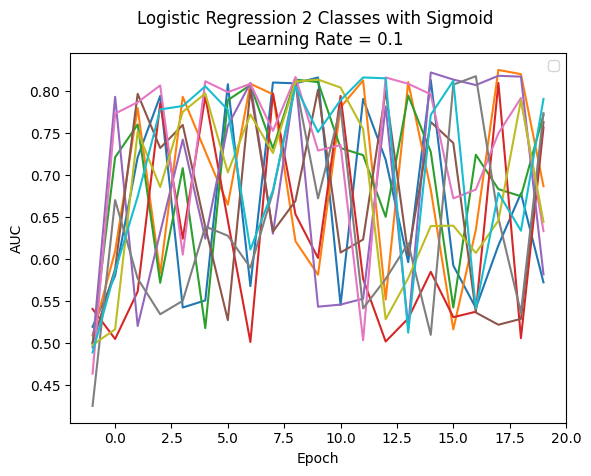


Test set: Avg. loss: 0.04328845596313476, AUC: 0.4365885


Test set: Avg. loss: 22.658755859375, AUC: 0.7255


Test set: Avg. loss: 49.719439453125, AUC: 0.6375000000000001


Test set: Avg. loss: 77.47021875, AUC: 0.5925


Test set: Avg. loss: 24.3698583984375, AUC: 0.7420000000000001


Test set: Avg. loss: 80.19519140625, AUC: 0.5805


Test set: Avg. loss: 59.253970703125, AUC: 0.619


Test set: Avg. loss: 203.6985234375, AUC: 0.5055


Test set: Avg. loss: 22.6232373046875, AUC: 0.7545000000000001


Test set: Avg. loss: 41.4113671875, AUC: 0.6255


Test set: Avg. loss: 14.42755517578125, AUC: 0.813


Test set: Avg. loss: 72.72373046875, AUC: 0.543


Test set: Avg. loss: 17.4869033203125, AUC: 0.79


Test set: Avg. loss: 134.3981484375, AUC: 0.5309999999999999


Test set: Avg. loss: 15.11494970703125, AUC: 0.8055


Test set: Avg. loss: 17.9449248046875, AUC: 0.7875000000000001


Test set: Avg. loss: 52.667796875, AUC: 0.5845


Test set: Avg. loss: 82.891265625, AUC: 0.535


Test set: 


Test set: Avg. loss: 184.5525625, AUC: 0.5065


Test set: Avg. loss: 112.798125, AUC: 0.5095000000000001


Test set: Avg. loss: 25.4045078125, AUC: 0.752


Test set: Avg. loss: 22.674421875, AUC: 0.757


Test set: Avg. loss: 65.170474609375, AUC: 0.6195


Test set: Avg. loss: 190.505296875, AUC: 0.5075000000000001


Test set: Avg. loss: 33.524361328125, AUC: 0.6759999999999999



KeyboardInterrupt: 

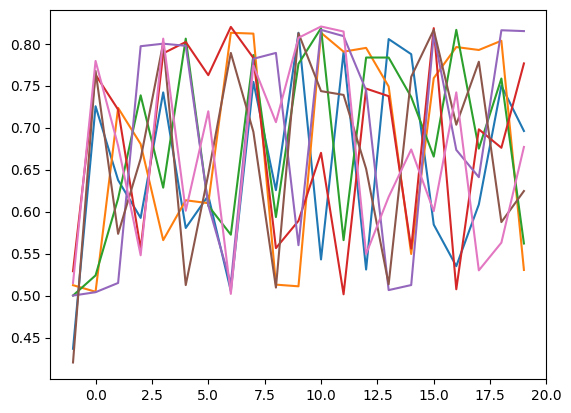

In [20]:
# SIGMOID 2 CLASS 

momentum=0
learning_rates = [0.1, 0.01, 0.001, 0.0001, 1e-5, 1e-6, 5e-7, 1e-7]

for learning_rate in learning_rates:
    aucs = []
    for i in range(10):
        model_aucs = []
        network = models.SigmoidLogisticRegression(NUM_CLASSES_REDUCED, shape=32*32*3)
        optimizer = optim.SGD(network.parameters(), lr=learning_rate, momentum=momentum)
        _, auc = metric_utils.auc_sigmoid(test_loader_reduced, network) 
        model_aucs.append(auc)
        for epoch in range(n_epochs):
            directory = f"{DIRECTORY}/{str(learning_rate)}/reduced{i}/model{epoch}"
            directory=None
            _, _ = train.train_sigmoid(epoch, train_loader_reduced, network, optimizer, verbose=False, directory=directory)
            _, auc = metric_utils.auc_sigmoid(test_loader_reduced, network)
            model_aucs.append(auc)
        aucs.append(model_aucs)
        plt.plot(np.arange(-1, n_epochs), aucs[i])
    plt.title("Logistic Regression 2 Classes with Sigmoid \n Learning Rate = " + str(learning_rate))
    plt.xlabel("Epoch")
    plt.ylabel("AUC")
    plt.legend()
    plt.show()
   

In [10]:
# SOFTMAX 3 class ratio

momentum=0
learning_rates = [0.1, 0.01, 0.001, 0.0001, 1e-5, 1e-6, 5e-7, 1e-7]

for learning_rate in learning_rates:
    aucs = []
    for i in range(10):
        model_aucs = []
        network = models.SoftmaxLogisticRegression(NUM_CLASSES_REDUCED, shape=32*32*3)
        optimizer = optim.SGD(network.parameters(), lr=learning_rate, momentum=momentum)
        _, auc = metric_utils.auc_softmax(test_loader_reduced, network)
        model_aucs.append(auc)
        for epoch in range(n_epochs):
            directory = f"{DIRECTORY}/{str(learning_rate)}/reduced{i}/model{epoch}"
            directory=None
            _, _ = train.train_softmax(epoch, train_loader_ratio, network, optimizer, verbose=False, directory=directory)
            _, auc = metric_utils.auc_softmax(test_loader_reduced, network)
            model_aucs.append(auc)
        aucs.append(model_aucs)
        plt.plot(np.arange(-1, n_epochs), aucs[i])
    plt.title("Logistic Regression 2 Classes with Sigmoid \n Learning Rate = " + str(learning_rate))
    plt.xlabel("Epoch")
    plt.ylabel("AUC")
    plt.legend()
    plt.show()

torch.Size([1000, 3, 32, 32])
torch.Size([1000, 3, 32, 32])

Test set: Avg. loss: 0.08715678024291992, AUC: 0.500999

i
torch.Size([64])


RuntimeError: shape '[-1, 3072]' is invalid for input of size 64

In [ ]:
for name, parameter in network.named_parameters(): 
    print(name)
    print(parameter)
    

In [19]:
# SIGMOID 2 CLASS RATIO

learning_rates = [0.1, 0.01, 0.001, 0.0001, 1e-5, 1e-6, 5e-7, 1e-7]

for learning_rate in learning_rates:
    aucs = []
    for i in range(10):
        model_aucs = []
        network = models.SigmoidLogisticRegression(NUM_CLASSES_REDUCED, shape=32*32*3)
        optimizer = optim.SGD(network.parameters(), lr=learning_rate, momentum=momentum)
        _, auc = metric_utils.auc_sigmoid(test_loader_reduced, network) 
        model_aucs.append(auc)
        for epoch in range(n_epochs):
            directory = f"{DIRECTORY}/{str(learning_rate)}/ratio{i}_{ratio[0]}/model{epoch}"
            directory=None
            _, _ = train.train_sigmoid(epoch, train_loader_ratio, network, optimizer, verbose=False, directory=directory)
            _, auc = metric_utils.auc_sigmoid(test_loader_reduced, network)
            model_aucs.append(auc)
        aucs.append(model_aucs)
        plt.plot(np.arange(-1, n_epochs), aucs[i])
    plt.title("Logistic Regression 2 Classes " + str(ratio) + " with Sigmoid \n Learning Rate = " + str(learning_rate))
    plt.xlabel("Epoch")
    plt.ylabel("AUC")
    plt.legend()
    plt.show()
   

ValueError: Target size (torch.Size([1000])) must be the same as input size (torch.Size([1000, 3]))

In [ ]:
# SIGMOID 2 CLASS RATIO w/ OVERSAMPLING 

learning_rates = [0.1, 0.01, 0.001, 0.0001, 1e-5, 1e-6, 5e-7, 1e-7]

for learning_rate in learning_rates:
    aucs = []
    for i in range(10):
        model_aucs = []
        network = models.SigmoidLogisticRegression(NUM_CLASSES_REDUCED, shape=32*32*3)
        optimizer = optim.SGD(network.parameters(), lr=learning_rate, momentum=momentum)
        _, auc = metric_utils.auc_sigmoid(test_loader_reduced, network) 
        model_aucs.append(auc)
        for epoch in range(n_epochs):
            _, _ = train.train_sigmoid(epoch, train_loader_oversampled, network, optimizer, verbose=False, directory=None)
            _, auc = metric_utils.auc_sigmoid(test_loader_reduced, network)
            model_aucs.append(auc)
        aucs.append(model_aucs)
        plt.plot(np.arange(-1, n_epochs), aucs[i])
    plt.title("Logistic Regression 2 Classes " + str(ratio) + " with Sigmoid and Oversampling \n Learning Rate = " + str(learning_rate))
    plt.xlabel("Epoch")
    plt.ylabel("AUC")
    plt.legend()
    plt.show()

In [ ]:
# ANALYZING DATA 
experiments = [("reduced", ""), ("ratio", "_10"), ("ratio", "_100")]

means = []
stds = []

learning_rate = 5e-07
ratio_num = ratio[0]

for experiment in experiments: 
    weights = []
    biases = []
    for i in range(10): 
        network = models.SigmoidLogisticRegression(NUM_CLASSES_REDUCED, shape=32*32*3)
        network.load_state_dict(torch.load(f"{DIRECTORY}/{learning_rate}/{experiment[0]}{i}{experiment[1]}/model19"))
        weights.append(network.state_dict()['fc.weight'])
        biases.append(network.state_dict()['fc.bias'])

    
        means.append(torch.cat(weights, 0).mean(axis=0))
        stds.append(torch.std(torch.cat(weights, 0), axis=0))

        
print(means)
print(stds)

In [ ]:
learning_rates = [0.1, 0.01, 0.001, 0.0001, 1e-5, 1e-6, 5e-7, 1e-7]
learning_rates = [5e-7]


experiments = [("reduced", ""), ("ratio", "_10"), ("ratio", "_100")]

means = []
stds = []
distances = []


for experiment in experiments: 
    for learning_rate in learning_rates: 
        best_auc = 0
        worst_auc = 100
        best_model = None
        worst_model = None 
        for i in range(10): 
            network = models.SigmoidLogisticRegression(NUM_CLASSES_REDUCED, shape=32*32*3)
            network.load_state_dict(torch.load(f"{DIRECTORY}/{learning_rate}/ratio{i}_100/model19"))
            weight = network.state_dict()['fc.weight']
            bias = network.state_dict()['fc.bias']
            params = torch.cat((weight.squeeze(), bias))


            _, auc = metric_utils.auc_sigmoid(test_loader_reduced, network)

            if auc > best_auc:
                best_auc = auc
                best_model = params
            if auc < worst_auc:
                worst_auc = auc
                worst_model = params


        dist = np.linalg.norm(best_model - worst_model)
        print(dist)

In [ ]:

def cosine_similarity(model_param1, model_param2): 
     return np.dot(model_param1, model_param2)/(np.linalg.norm(model_param1, axis=0)*np.linalg.norm(model_param2)) 

def euclidean_distance(model_param1, model_param2): 
    return np.linalg.norm(model_param1 - model_param2)


def pairwise_distance(model_params, distance_fn=euclidean_distance): 
    distances = []
    for i in range(len(model_params)):
        for j in range(i + 1, len(model_params)):
            distances.append(distance_fn(model_params[i], model_params[j]))
    return distances

def distance(model_params1, model_params2, distance_fn=euclidean_distance):
    distances = []
    for i in range(len(model_params1)): 
        for j in range(len(model_params2)):
            distances.append(distance_fn(model_params1[i], model_params2[j]))
    return distances



In [ ]:
learning_rate = 1e-6
experiments = [("reduced", ""), ("ratio", "_10"), ("ratio", "_100")]

model_dict = {}

distance_fn = euclidean_distance

for experiment in experiments: 
    model_params = []
    for i in range(10): 
        network = models.SigmoidLogisticRegression(NUM_CLASSES_REDUCED, shape=32*32*3)
        network.load_state_dict(torch.load(f"{DIRECTORY}/{learning_rate}/{experiment[0]}{i}{experiment[1]}/model19"))
        model_params.append(torch.cat((network.state_dict()['fc.weight'].squeeze(), network.state_dict()['fc.bias'])))
    model_dict[experiment[0] + experiment[1]] = model_params



for model_name, model_params in model_dict.items():
    
    distances = pairwise_distance(model_params, distance_fn=distance_fn)
    
    plt.hist(distances)
    plt.title(model_name)
    plt.show()
    

distances = distance(model_dict["reduced"], model_dict["ratio_100"], distance_fn=distance_fn)
plt.hist(distances)
plt.title("reduced vs ratio_100")
plt.show()
    
distances = distance(model_dict["reduced"], model_dict["ratio_10"], distance_fn=distance_fn)
plt.hist(distances)
plt.title("reduced vs ratio_10")
plt.show()
      
